In [2]:
library(ggplot2)
library(igraph)
library(data.table)
library(magrittr)
psize = function(x=10,y=5) { options(repr.plot.width=x, repr.plot.height=y) } 

In [3]:
psize = function(x=10,y=5) { options(repr.plot.width=x, repr.plot.height=y) } 

In [4]:
1+1

[1] 2

In [5]:
change_names <- function(dt, lookup, mycol="name"){
  # function to replace names of nodes, using a lookup table
  ## dt: data frame to change
  ## mycol: column in dt to change
  ## lookup table with 'old' and 'new' column, representing old and new names
  dt[, id:=1:nrow(dt)]
  dt <- merge(dt, lookup[,.(old, new)], by.x=mycol, by.y="old", all.x=T)
  dt <- dt[!is.na(new), as.character(mycol):=new][,new:=NULL]
  dt <- dt[order(id)]
  dt[,id:=NULL]
  return(dt)
}

In [6]:
covidgenes_negb = read.table("results/covid_net/edgelist/phy_bind_meanSim.csv", sep=",", header=TRUE)

covidgenes_negb$node1 = gsub("GO:", "", covidgenes_negb$node1)
length(unique(covidgenes_negb$node1))

node_dict <- fread(file="../../../data/lookup/node_dict.txt");dim(node_dict); head(node_dict)
node_name_mapping = read.table("../../../data/lookup/node_name_mapping.txt", sep=",", header=TRUE)
covidgenes_negb <- change_names(as.data.table(covidgenes_negb), as.data.table(node_name_mapping), mycol="node2")
head(covidgenes_negb)


modalities = c("PRS_covid19Severe", "PRS_covid19", "PRS_covid19Hospitalization") 
c_genes <- covidgenes_negb[node2%in% modalities, node1]
table_for_graph  <- covidgenes_negb[node1 %in% c_genes]
table_for_graph <- merge(table_for_graph, node_dict[,.(new, type, color)], by.x="node2", by.y="new", all.x=T)
graph_table <- merge(unique(table_for_graph[,.(node1, source)]), node_dict[,.(new, type, color)], by.x="node1", by.y="new", all.x=T)
#pal <- c("#5885AF", "#607B8B", "#C3E0E5")
#graph_table$color = pal[as.numeric(as.factor(graph_table$source))]
graph_table$color="#2E8BC0"
graph_table[,frame_color:=color]



[1] 150

[1] 7312    4

old,type,color,new
MHASTHMA,como,#C06C84,asthma
MHCOPD,como,#C06C84,COPD
MHCVD,como,#C06C84,cerebrovascularDiease
MHDPRSSN,como,#C06C84,majorDepression
MHHRTDIS,como,#C06C84,ischemicHeartDisease
MHHTN,como,#C06C84,hyptertension


node2,X,node1,neighbour,type_node1,type_node2,N,mean_sim,max_sim,sem_sim,source,experiment
PRS_coronaryArteryDisease,59,RPL30,2,gene,prs,100,0.836968,0.868760,0.012847,Lee,physical_binding
PRS_covid19Hospitalization,63,RPL21,2,gene,prs,100,0.831392,0.873327,0.014809,Lee,physical_binding
PRS_COPD,72,RPL30,2,gene,prs,100,0.826618,0.851346,0.012244,Lee,physical_binding
PRS_heartFailure,78,RPL30,1,gene,prs,100,0.822627,0.841624,0.008942,Lee,physical_binding
PRS_ADHD,94,RPL30,2,gene,prs,100,0.816059,0.844937,0.013170,Lee,physical_binding
PRS_heartFailure,137,RPL17,3,gene,prs,100,0.798118,0.831330,0.020478,Lee,physical_binding


In [9]:
graph_table

node1,source,type,color,frame_color
CUL2,Gordon,gene,#2E8BC0,#2E8BC0
DNMT1,Gordon,gene,#2E8BC0,#2E8BC0
EIF4G1,Lee,gene,#2E8BC0,#2E8BC0
RPL14,Lee,gene,#2E8BC0,#2E8BC0
RPL17,Lee,gene,#2E8BC0,#2E8BC0
RPL21,Lee,gene,#2E8BC0,#2E8BC0
RPL24,Lee,gene,#2E8BC0,#2E8BC0
RPL30,Lee,gene,#2E8BC0,#2E8BC0
RPL36,Gordon,gene,#2E8BC0,#2E8BC0
RPS11,Lee,gene,#2E8BC0,#2E8BC0


In [7]:
leg_dt <- unique(table_for_graph[,.(type, color)])
leg_dt[type=="como", type:="comorbidity"]
leg_dt[type=="prs", type:="PRS"]
#leg_dt2 <- as.data.table(rbind(as.data.frame(leg_dt),c("gene", "#355C7D")))
leg_dt2 <- as.data.table(rbind(as.data.frame(leg_dt),c("gene", "#2E8BC0")))

leg_dt2

leg_dt1 <- graph_table[node1%in% c("CUL2", "RPL17")]

type,color
comorbidity,#C06C84
PRS,#F67280
gene,#2E8BC0


In [8]:
table_for_graph[order(node1)]

node2,X,node1,neighbour,type_node1,type_node2,N,mean_sim,max_sim,sem_sim,source,experiment,type,color
PRS_covid19Severe,1975,CUL2,2,gene,prs,100,0.680859,0.755699,0.034727,Gordon,physical_binding,prs,#F67280
PRS_covid19Severe,2670,DNMT1,2,gene,prs,100,0.661498,0.697104,0.016661,Gordon,physical_binding,prs,#F67280
PRS_heartFailure,2269,DNMT1,1,gene,prs,100,0.672123,0.701461,0.014178,Gordon,physical_binding,prs,#F67280
cerebrovascularDiease,2651,DNMT1,2,gene,como,100,0.662231,0.698029,0.015330,Gordon,physical_binding,como,#C06C84
ischemicHeartDisease,2832,DNMT1,2,gene,como,100,0.656704,0.696318,0.017917,Gordon,physical_binding,como,#C06C84
PRS_covid19Hospitalization,864,EIF4G1,2,gene,prs,100,0.723187,0.779232,0.029978,Lee,physical_binding,prs,#F67280
PRS_ADHD,557,RPL14,2,gene,prs,100,0.740988,0.784441,0.021666,Lee,physical_binding,prs,#F67280
PRS_COPD,1289,RPL14,2,gene,prs,100,0.705096,0.746108,0.017047,Lee,physical_binding,prs,#F67280
PRS_CRP,768,RPL14,1,gene,prs,100,0.728818,0.763259,0.015583,Lee,physical_binding,prs,#F67280
PRS_coronaryArteryDisease,974,RPL14,2,gene,prs,100,0.718049,0.791478,0.038990,Lee,physical_binding,prs,#F67280


In [69]:
study="physical"
context <- covidgenes_negb[,.N, by=.(node2, type_node2)][order(-N)]
dt = context[type_node2=="pheno"] %>% dplyr::rename(node=node2, type=type_node2, count=N)
all=sum(dt$count)
dt[,ratio:=count/all]
fwrite(dt, file=paste0("results/fig3_supp_net_context/",study, "_pheno_dt.csv"))
dt=context[type_node2=="como"] %>% dplyr::rename(node=node2,  type=type_node2,count=N)
all=sum(dt$count)
dt[,ratio:=count/all]
fwrite(dt, file=paste0("results/fig3_supp_net_context/",study, "_como_dt.csv"))
dt=context[type_node2=="prs"] %>% dplyr::rename(node=node2,  type=type_node2,count=N)
all=sum(dt$count)
dt[,ratio:=count/all]
fwrite(dt, file=paste0("results/fig3_supp_net_context/",study, "_prs_dt.csv"))
dt=context[type_node2=="tissue"]%>% dplyr::rename(node=node2,  type=type_node2,count=N)
all=sum(dt$count)
dt[,ratio:=count/all]
fwrite(dt, file=paste0("results/fig3_supp_net_context/",study, "_tissue_dt.csv"))


gene_source=graph_table[,.(node1, source)] %>% dplyr::rename(gene=node1)
fwrite(gene_source[order(gene)], file=paste0("results/fig3_supp_net_context/",study, "_gene_source.csv"))

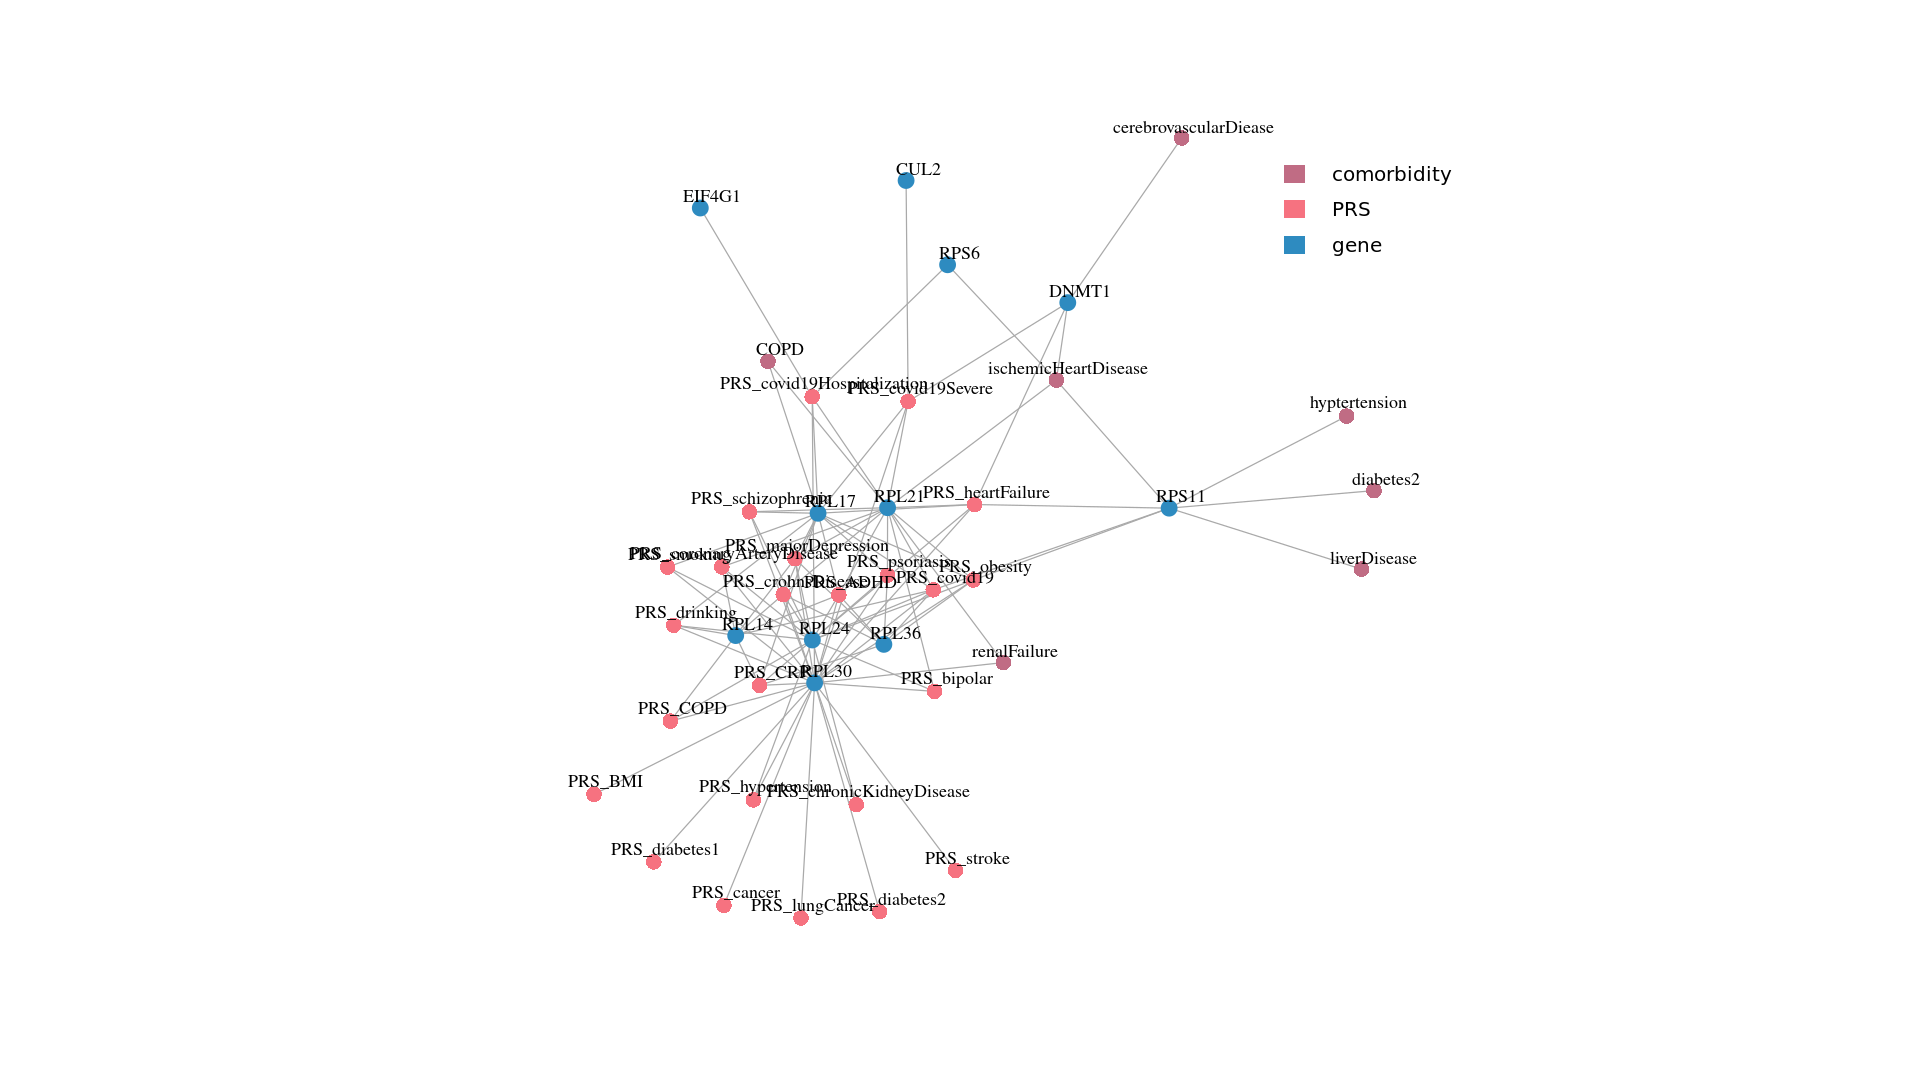

In [70]:
psize(16,9)

g = graph.empty(directed = F)

#g2 = graph.empty(directed = F)

g <- add.vertices(g,nv=length(graph_table$node1)
                  ,attr=list(name=graph_table$node1, color = graph_table$color,
                             frame.color=graph_table$frame_color)
                  ,type=rep(FALSE,length(graph_table$node1)))

dt_other <- unique(table_for_graph[,.(node2, color)])
g <- add.vertices(g,nv=length(dt_other$node2),
                  attr=list(name=as.character(unique(dt_other$node2)), color=dt_other$color),
                  type=rep(TRUE,length(unique(dt_other$node2))))



edges1 = table_for_graph[, .(node1, node2)]
edge.list.vec_1 <- as.vector(t(as.matrix(data.frame(edges1))))


g <- add.edges(g,edge.list.vec_1)

lo = layout_nicely(g, dim = 2)

distances = c(0.6, 0.6)[V(g)$type + 1L]
#shapes = c("circle", "square")[V(g)$type + 1L]
#, vertex.shape=shapes


plot(g, vertex.size = 4, vertex.label.cex = 0.9, vertex.label.color = "black",
        layout = lo,vertex.label.dist=distances)

legend(x = 0.7, y = 1, bty ='n', legend=unique(leg_dt2$type), fill=unique(leg_dt2$color), border=NA)
#legend(x = 0.8, y = 0.65, bty ='n', legend=unique(leg_dt1$source), fill=unique(leg_dt1$color), border=NA)


In [10]:
psize = function(x=10,y=5) { options(repr.plot.width=x, repr.plot.height=y) } 

In [77]:
svg(file="results/fig3_covid_net/phy_bind_net_colors_2.svg", width=16, height=16)

psize(16,9)

g = graph.empty(directed = F)

#g2 = graph.empty(directed = F)

g <- add.vertices(g,nv=length(graph_table$node1)
                  ,attr=list(name=graph_table$node1, color = graph_table$color,
                             frame.color=graph_table$frame_color)
                  ,type=rep(FALSE,length(graph_table$node1)))

dt_other <- unique(table_for_graph[,.(node2, color)])
g <- add.vertices(g,nv=length(dt_other$node2),
                  attr=list(name=as.character(unique(dt_other$node2)), color=dt_other$color),
                  type=rep(TRUE,length(unique(dt_other$node2))))



edges1 = table_for_graph[, .(node1, node2)]
edge.list.vec_1 <- as.vector(t(as.matrix(data.frame(edges1))))


g <- add.edges(g,edge.list.vec_1)

lo = layout_nicely(g, dim = 2)

distances = c(0.6, 0.6)[V(g)$type + 1L]
#shapes = c("circle", "square")[V(g)$type + 1L]
#, vertex.shape=shapes


plot(g, vertex.size = 4, vertex.label.cex = 0.9, vertex.label.color = "black",
        layout = lo,vertex.label.dist=distances)

legend(x = 0.7, y = 1, bty ='n', legend=unique(leg_dt2$type), fill=unique(leg_dt2$color), border=NA)
#legend(x = 0.8, y = 0.65, bty ='n', legend=unique(leg_dt1$source), fill=unique(leg_dt1$color), border=NA)




dev.off()

png 
  2

# CRISPR

In [46]:
covidgenes_negb = read.table("results/covid_net/edgelist/CRISPR_meanSim.csv", sep=",", header=TRUE)
covidgenes_negb$node1 = gsub("GO:", "", covidgenes_negb$node1)
length(unique(covidgenes_negb$node1))

node_dict <- fread(file="../../../data/lookup/node_dict.txt");dim(node_dict); head(node_dict)
node_name_mapping = read.table("../../../data/lookup/node_name_mapping.txt", sep=",", header=TRUE)
covidgenes_negb <- change_names(as.data.table(covidgenes_negb), as.data.table(node_name_mapping), mycol="node2")



modalities = c("PRS_covid19Severe", "PRS_covid19", "PRS_covid19Hospitalization") 
c_genes <- covidgenes_negb[node2%in% modalities, node1]
table_for_graph  <- covidgenes_negb[node1 %in% c_genes]
table_for_graph <- merge(table_for_graph, node_dict[,.(new, type, color)], by.x="node2", by.y="new", all.x=T)
graph_table <- merge(unique(table_for_graph[,.(node1, source)]), node_dict[,.(new, type, color)], by.x="node1", by.y="new", all.x=T)
pal <- c("#5885AF", "#607B8B", "#C3E0E5")
graph_table$color = pal[as.numeric(as.factor(graph_table$source))]
graph_table[,frame_color:=color]
graph_table$color = "#2E8BC0"
#graph_table$color = pal[as.numeric(as.factor(graph_table$source))]

[1] 81

[1] 7312    4

old,type,color,new
MHASTHMA,como,#C06C84,asthma
MHCOPD,como,#C06C84,COPD
MHCVD,como,#C06C84,cerebrovascularDiease
MHDPRSSN,como,#C06C84,majorDepression
MHHRTDIS,como,#C06C84,ischemicHeartDisease
MHHTN,como,#C06C84,hyptertension


In [47]:
#graph_table[node1=="MED16", color:="#C3E0E5"]
#graph_table[,frame_color:=color]
#graph_table[node1=="MED16", frame_color:="#5885AF"]
leg_dt1 <- graph_table[node1%in% c("PSMC2", "TRAF3")]

In [48]:
leg_dt <- unique(table_for_graph[,.(type, color)])
leg_dt[type=="como", type:="comorbidity"]
leg_dt[type=="prs", type:="PRS"]
leg_dt2 <- as.data.table(rbind(as.data.frame(leg_dt),c("gene", "#2E8BC0")))
leg_dt2

type,color
tissue,#6C5B7B
comorbidity,#C06C84
PRS,#F67280
gene,#2E8BC0


In [49]:
dt_shape=data.table(id=1:length(c(graph_table$node1, dt_other$node2)),nodes=c(graph_table$node1, dt_other$node2))
dt_shape=merge(dt_shape, node_dict[,.(new, type)], by.x="nodes", by.y="new")[order(id)]
dt_shape[type=="gene", shape:="circle"]
dt_shape[type=="tissue", shape:="square"]
dt_shape[type=="como", shape:="vrectangle"]
dt_shape[type=="prs", shape:="crectangle"]

In [50]:
dt_shape$shapes

NULL

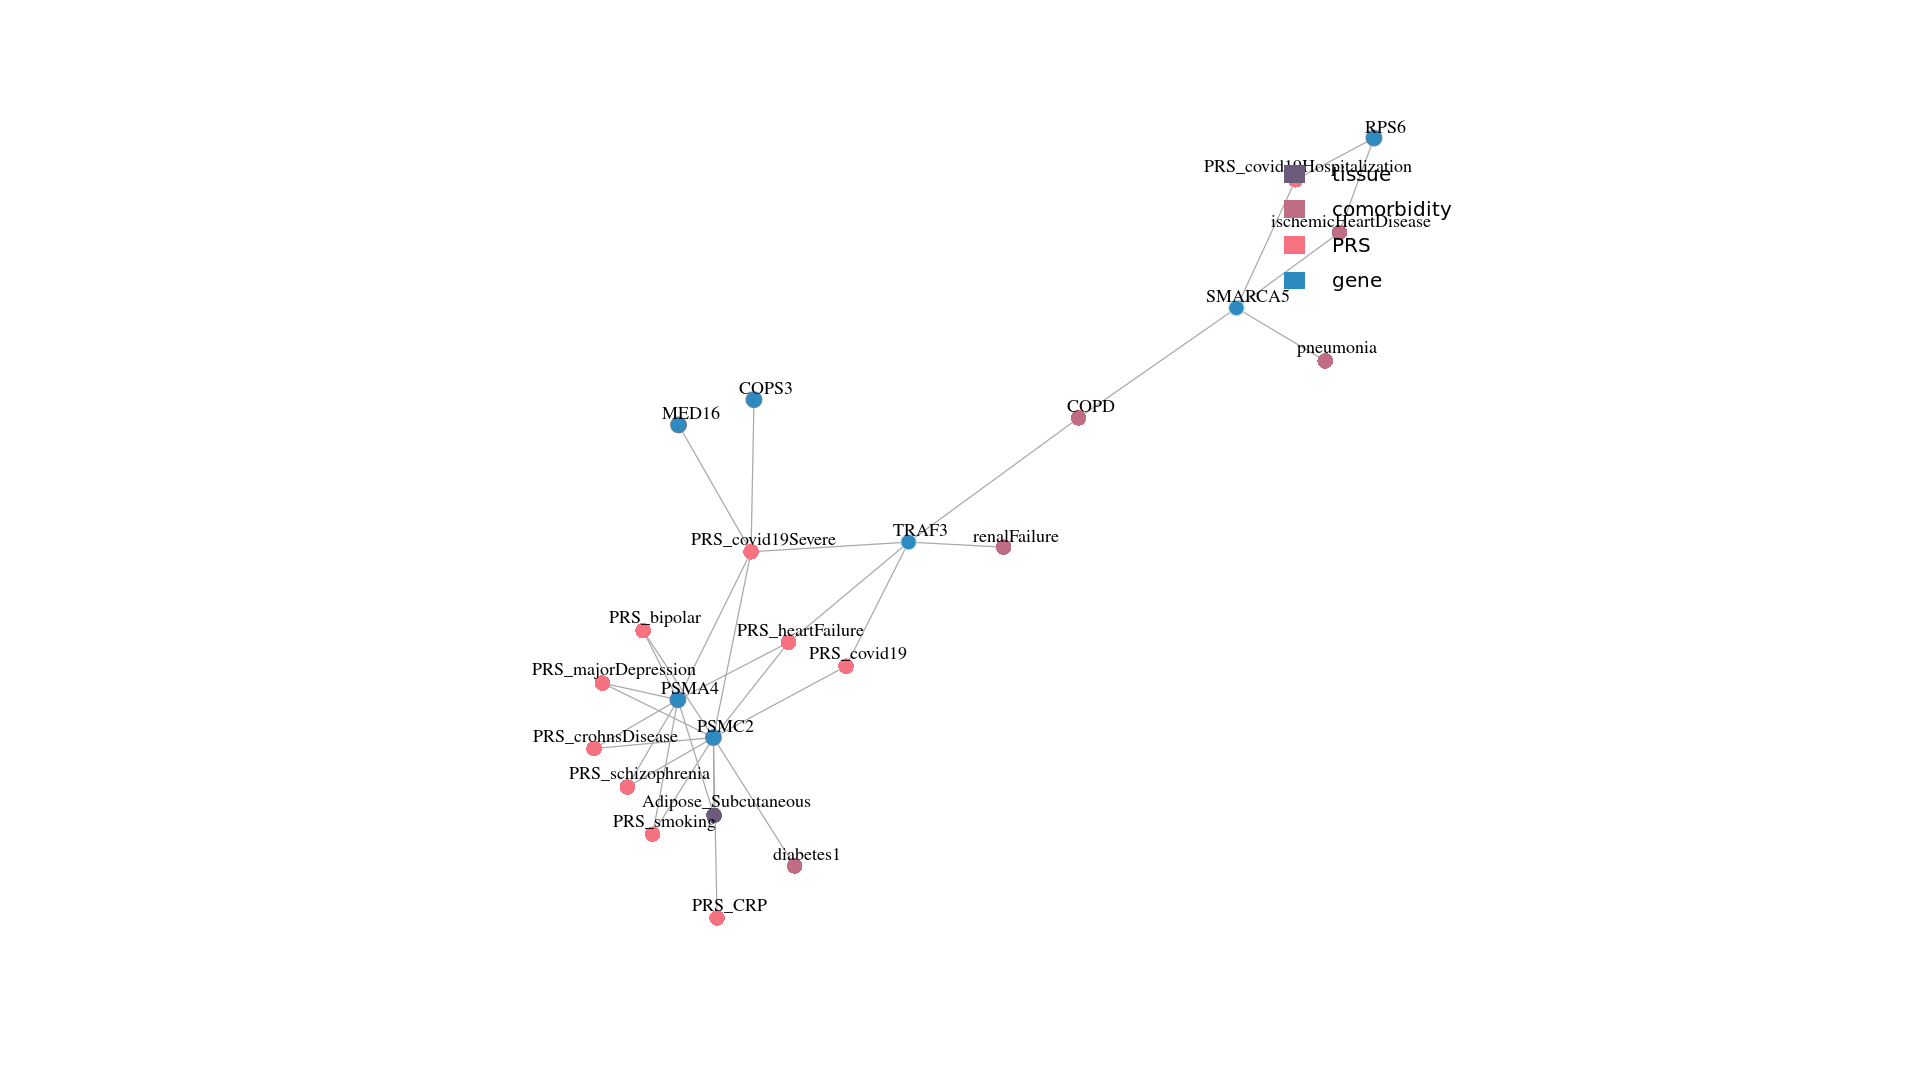

In [51]:
psize(16,9)

g = graph.empty(directed = F)

#g2 = graph.empty(directed = F)

g <- add.vertices(g,nv=length(graph_table$node1)
                  ,attr=list(name=graph_table$node1, color = graph_table$color,
                             frame.color=graph_table$frame_color)
                  ,type=rep(FALSE,length(graph_table$node1)))

dt_other <- unique(table_for_graph[,.(node2, color)])
g <- add.vertices(g,nv=length(dt_other$node2),
                  attr=list(name=as.character(unique(dt_other$node2)), color=dt_other$color),
                  type=rep(TRUE,length(unique(dt_other$node2))))



edges1 = table_for_graph[, .(node1, node2)]
edge.list.vec_1 <- as.vector(t(as.matrix(data.frame(edges1))))


g <- add.edges(g,edge.list.vec_1)

lo = layout_nicely(g, dim = 2)

distances = c(0.6, 0.6)[V(g)$type + 1L]

#shapes = c("circle", "square")[V(g)$type + 1L]
#, vertex.shape=shapes


#plot(g, vertex.size = 4, vertex.label.cex = 0.9, vertex.label.color = "black",
#        layout = lo,vertex.label.dist=distances, vertex.shape=dt_shape$shape,vertex.size2=7)
plot(g, vertex.size = 4, vertex.label.cex = 0.9, vertex.label.color = "black",
        layout = lo,vertex.label.dist=distances)

legend(x = 0.7, y = 1, bty ='n', legend=unique(leg_dt2$type), fill=unique(leg_dt2$color), border=NA)
#legend(x = 0.8, y = 0.65, bty ='n', legend=unique(leg_dt1$source), fill=unique(leg_dt1$color), border=NA)


In [55]:
svg(file="results/fig3_covid_net/CRISPR_net.svg", width=12, height=12)
psize(16,9)

g = graph.empty(directed = F)

#g2 = graph.empty(directed = F)

g <- add.vertices(g,nv=length(graph_table$node1)
                  ,attr=list(name=graph_table$node1, color = graph_table$color,
                             frame.color=graph_table$frame_color)
                  ,type=rep(FALSE,length(graph_table$node1)))

dt_other <- unique(table_for_graph[,.(node2, color)])
g <- add.vertices(g,nv=length(dt_other$node2),
                  attr=list(name=as.character(unique(dt_other$node2)), color=dt_other$color),
                  type=rep(TRUE,length(unique(dt_other$node2))))



edges1 = table_for_graph[, .(node1, node2)]
edge.list.vec_1 <- as.vector(t(as.matrix(data.frame(edges1))))


g <- add.edges(g,edge.list.vec_1)

lo = layout_nicely(g, dim = 2)

distances = c(0.6, 0.6)[V(g)$type + 1L]
#shapes = c("circle", "square")[V(g)$type + 1L]
#, vertex.shape=shapes


plot(g, vertex.size = 4, vertex.label.cex = 0.9, vertex.label.color = "black",
        layout = lo,vertex.label.dist=distances)

legend(x = 0.7, y = 1, bty ='n', legend=unique(leg_dt2$type), fill=unique(leg_dt2$color), border=NA)
#legend(x = 0.8, y = 0.65, bty ='n', legend=unique(leg_dt1$source), fill=unique(leg_dt1$color), border=NA)


dev.off()

png 
  2

In [55]:
study="CRISPR"
context <- covidgenes_negb[,.N, by=.(node2, type_node2)][order(-N)]
dt = context[type_node2=="pheno"] %>% dplyr::rename(node=node2, type=type_node2, count=N)
all=sum(dt$count)
dt[,ratio:=count/all]
fwrite(dt, file=paste0("results/fig3_supp_net_context/",study, "_pheno_dt.csv"))
dt=context[type_node2=="como"] %>% dplyr::rename(node=node2,  type=type_node2,count=N)
all=sum(dt$count)
dt[,ratio:=count/all]
fwrite(dt, file=paste0("results/fig3_supp_net_context/",study, "_como_dt.csv"))
dt=context[type_node2=="prs"] %>% dplyr::rename(node=node2,  type=type_node2,count=N)
all=sum(dt$count)
dt[,ratio:=count/all]
fwrite(dt, file=paste0("results/fig3_supp_net_context/",study, "_prs_dt.csv"))
dt=context[type_node2=="tissue"]%>% dplyr::rename(node=node2,  type=type_node2,count=N)
all=sum(dt$count)
dt[,ratio:=count/all]
fwrite(dt, file=paste0("results/fig3_supp_net_context/",study, "_tissue_dt.csv"))


gene_source=graph_table[,.(node1, source)] %>% dplyr::rename(gene=node1)
fwrite(gene_source[order(gene)], file=paste0("results/fig3_supp_net_context/",study, "_gene_source.csv"))

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE

In [81]:
svg(file="results/fig3_covid_net/CRISPR_net.svg", width=12, height=12)
psize(16,9)

g = graph.empty(directed = F)

#g2 = graph.empty(directed = F)

g <- add.vertices(g,nv=length(graph_table$node1)
                  ,attr=list(name=graph_table$node1, color = graph_table$color,
                             frame.color=graph_table$frame_color)
                  ,type=rep(FALSE,length(graph_table$node1)))

dt_other <- unique(table_for_graph[,.(node2, color)])
g <- add.vertices(g,nv=length(dt_other$node2),
                  attr=list(name=as.character(unique(dt_other$node2)), color=dt_other$color),
                  type=rep(TRUE,length(unique(dt_other$node2))))



edges1 = table_for_graph[, .(node1, node2)]
edge.list.vec_1 <- as.vector(t(as.matrix(data.frame(edges1))))


g <- add.edges(g,edge.list.vec_1)

lo = layout_nicely(g, dim = 2)

distances = c(0.6, 0.6)[V(g)$type + 1L]
#shapes = c("circle", "square")[V(g)$type + 1L]
#, vertex.shape=shapes

plot(g, vertex.size = 4, vertex.label.cex = 0.9, vertex.label.color = "black",
        layout = lo,vertex.label.dist=distances)

legend(x = 0.7, y = 1, bty ='n', legend=unique(leg_dt2$type), fill=unique(leg_dt2$color), border=NA)
legend(x = 0.8, y = 0.65, bty ='n', legend=unique(leg_dt1$source), fill=unique(leg_dt1$color), border=NA)
dev.off()

png 
  2

In [83]:
shapes = c("circle", "square")[V(g)$type + 1L]
shapes

[1] "circle" "circle" "circle" "circle" "circle" "circle" "circle" "square"
 [9] "square" "square" "square" "square" "square" "square" "square" "square"
[17] "square" "square" "square" "square" "square" "square" "square"